<a href="https://colab.research.google.com/github/bheemeshpujari63/Nature-oncology-scraper/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
numpy
pandas
matplotlib
seaborn
scikit-learn
nltk
transformers
folium
geopandas
praw
nltk
emoji
spacy


In [1]:

!pip install numpy pandas matplotlib seaborn scikit-learn nltk transformers folium geopandas praw emoji spacy



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 27.8 MB/s eta 0:00:00


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

   Post ID            Timestamp   Subreddit  \
0   own79d  2021-08-02 20:33:09  depression   
1  1g48c9t  2024-10-15 13:57:49  depression   
2  1jd1y5e  2025-03-17 02:02:28  depression   
3  1iew0lj  2025-02-01 02:15:58  depression   
4  1bum6er  2024-04-03 07:01:39  depression   

                                               Title  \
0           Get support for yourself or other people   
1       I don't get how other people aren't suicidal   
2                   My mom told me to commit suicide   
3                 Im 13 and i just attempted suicide   
4  Finally let my wife know I was suicidal and sh...   

                                             Content  Upvotes  Comments  \
0  If you’d like to talk to someone, confidential...      303         2   
1  I'm in therapy, I'm taking medications and I s...      939       174   
2  I'm from a half Asian household, my mothers Ch...      644       119   
3  I came backfrom school and again i was bullied...      363       163   
4  Ye

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


✅ Cleaned data saved as reddit_crisis_data_cleaned.csv
Columns in the dataset: Index(['Post ID', 'Timestamp', 'Subreddit', 'Upvotes', 'Comments', 'URL',
       'Cleaned_Content', 'Cleaned_Title'],
      dtype='object')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
<ipython-input-4-bb18fb731ea7>:154: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Sentiment"], palette="coolwarm")


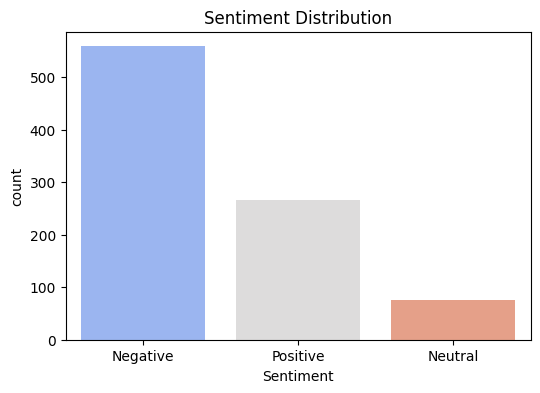

<ipython-input-4-bb18fb731ea7>:160: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Risk Level"], palette="magma")


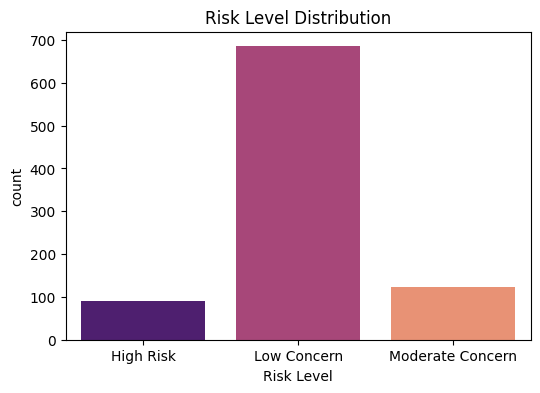

✅ Task 2 Completed! Data saved as 'reddit_crisis_data_classified.csv'
                                       Cleaned_Content     Location
89   friend recently confided depression anxiety wa...  helpsupport
147  im f im married friends basically allowed talk...        kinda
158  hi reddit need share something im turning begi...           uk
179  b shots taking b complex folic acid weeks neve...          hou
199  guess reading almost posts share experience oc...  netherlands


In [4]:
import praw  # Reddit API wrapper
import pandas as pd
import json
from datetime import datetime

# 🔑 Reddit API Credentials (Replace with your credentials)
CLIENT_ID = "inWQkyonxmRpjdnhbTX1LA"
CLIENT_SECRET = "FZDrubVFmsiqS0Nk9lIW_-BWDvmW3w"
USER_AGENT = "GSOC-Sentiment"

# ✅ Authenticate with Reddit
reddit = praw.Reddit(client_id=CLIENT_ID,
                     client_secret=CLIENT_SECRET,
                     user_agent=USER_AGENT)
# Define crisis-related keywords
keywords = ["suicidal", "depressed", "addiction help", "overwhelmed", "anxious",
            "mental breakdown", "self-harm", "lonely", "panic attack", "hopeless",
            "therapy", "relapse", "alcohol abuse", "drug overdose", "burnout"]

# Subreddits to search in
subreddits = ["depression", "mentalhealth", "suicidewatch"]

# List to store extracted post data
posts_data = []

# Loop through each subreddit and keyword
for subreddit_name in subreddits:
    subreddit = reddit.subreddit(subreddit_name)

    for keyword in keywords:
        for post in subreddit.search(keyword, limit=20):  # Fetch top 20 posts per keyword
            posts_data.append({
                "Post ID": post.id,
                "Timestamp": datetime.utcfromtimestamp(post.created_utc).strftime('%Y-%m-%d %H:%M:%S'),
                "Subreddit": subreddit_name,
                "Title": post.title,
                "Content": post.selftext[:500],  # Limit content to 500 chars for preview
                "Upvotes": post.score,
                "Comments": post.num_comments,
                "URL": post.url
            })

# Convert to DataFrame
df = pd.DataFrame(posts_data)
print(df.head())  # Preview first 5 results
# Save data as CSV
df.to_csv("reddit_crisis_data.csv", index=False)
print("✅ Data saved as reddit_crisis_data.csv")

# Save data as JSON
df.to_json("reddit_crisis_data.json", orient="records", indent=4)
print("✅ Data saved as reddit_crisis_data.json")
import pandas as pd
import re
import nltk
import emoji
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load the extracted Reddit data
df = pd.read_csv("reddit_crisis_data.csv")

# Function to clean text
def clean_text(text):
    if pd.isna(text):  # Handle empty values
        return ""

    # Convert emojis to text descriptions (e.g., 😢 → "crying face")
    text = emoji.demojize(text)

    # Remove special characters, links, and numbers
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove special characters and numbers

    # Convert text to lowercase and remove stopwords
    words = text.lower().split()
    words = [word for word in words if word not in stop_words]

    return " ".join(words)

# Apply text cleaning to "Content" and "Title"
df["Cleaned_Content"] = df["Content"].apply(clean_text)
df["Cleaned_Title"] = df["Title"].apply(clean_text)

# Drop original content column to keep only cleaned data
df_cleaned = df.drop(columns=["Content", "Title"])

# Save cleaned data
df_cleaned.to_csv("reddit_crisis_data_cleaned.csv", index=False)
print("✅ Cleaned data saved as reddit_crisis_data_cleaned.csv")

# Preview cleaned dataset
df_cleaned.head()
import pandas as pd

# Load the dataset
df = pd.read_csv("reddit_crisis_data_cleaned.csv")

# Print column names
print("Columns in the dataset:", df.columns)
# Install necessary libraries (run this only once)
!pip install nltk textblob vaderSentiment scikit-learn matplotlib seaborn

# Import libraries
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the cleaned dataset from Task 1
df = pd.read_csv("reddit_crisis_data_cleaned.csv")

# Initialize Sentiment Analyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Apply VADER Sentiment Analysis
def get_sentiment(text):
    score = sia.polarity_scores(text)["compound"]
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df["Sentiment"] = df["Cleaned_Content"].astype(str).apply(get_sentiment)

# Define high-risk terms
high_risk_terms = ["suicidal", "end my life", "self-harm", "kill myself", "hopeless"]
moderate_risk_terms = ["depressed", "overwhelmed", "lost", "need help"]
low_risk_terms = ["mental health", "therapy", "stress", "anxiety"]

# Function to classify risk level
def classify_risk(text):
    text = text.lower()
    if any(term in text for term in high_risk_terms):
        return "High Risk"
    elif any(term in text for term in moderate_risk_terms):
        return "Moderate Concern"
    else:
        return "Low Concern"

df["Risk Level"] = df["Cleaned_Content"].astype(str).apply(classify_risk)

# Visualizing Sentiment Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Sentiment"], palette="coolwarm")
plt.title("Sentiment Distribution")
plt.show()

# Visualizing Risk Level Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Risk Level"], palette="magma")
plt.title("Risk Level Distribution")
plt.show()

# Save the classified dataset
df.to_csv("reddit_crisis_data_classified.csv", index=False)

print("✅ Task 2 Completed! Data saved as 'reddit_crisis_data_classified.csv'")
%pip install spacy

import pandas as pd
import spacy

# Load dataset
df = pd.read_csv("reddit_crisis_data_cleaned.csv")

# Load pre-trained NLP model (spaCy's model for entity recognition)
nlp = spacy.load("en_core_web_sm")

# Function to extract locations from text
def extract_location(text):
    doc = nlp(str(text))
    for ent in doc.ents:
        if ent.label_ == "GPE":  # GPE = Geopolitical Entity (Cities, Countries, etc.)
            return ent.text
    return None

# Apply the function to extract locations
df["Location"] = df["Cleaned_Content"].apply(extract_location)

# Remove rows where Location is missing
df = df.dropna(subset=["Location"])

print(df[["Cleaned_Content", "Location"]].head())  # Check extracted locations
